In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from networks.unet import UNet
from utils.visualization import _aligned_colorbar

%reload_ext autoreload
%autoreload 2

In [2]:
model = UNet(in_channels=3)
model.load(Path("runs/1hpnn/model_padding_circular_manual_inputs_gks"))
datapoint = torch.load("/home/pelzerja/Development/datasets_prepared/1hp_boxes/dataset_2d_small_100dp inputs_gks/Inputs/RUN_0.pt")
datapoint = datapoint.unsqueeze(dim=0)


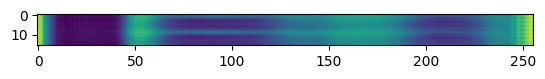

In [3]:
output = model(datapoint).detach().numpy()
plt.imshow(output[0,0].T)

In [8]:
print(model.__dict__.keys())
print(model.__dict__["_modules"].keys())
encoders = model.__dict__["_modules"]["encoders"]
pools = model.__dict__["_modules"]["pools"]
upconvs = model.__dict__["_modules"]["upconvs"]
decoders = model.__dict__["_modules"]["decoders"]
conv = model.__dict__["_modules"]["conv"]


dict_keys(['training', '_parameters', '_buffers', '_non_persistent_buffers_set', '_backward_hooks', '_is_full_backward_hook', '_forward_hooks', '_forward_pre_hooks', '_state_dict_hooks', '_load_state_dict_pre_hooks', '_load_state_dict_post_hooks', '_modules'])
odict_keys(['encoders', 'pools', 'upconvs', 'decoders', 'conv'])


In [5]:
def plot_pushed_data(data):
    data = data.detach().numpy()[0]
    num_subplots = 5
    plt.subplots(num_subplots,1, figsize=(20,10))
    for i in range(num_subplots):
        plt.subplot(num_subplots,1, i+1)
        plt.imshow(data[i].T)
        _aligned_colorbar()

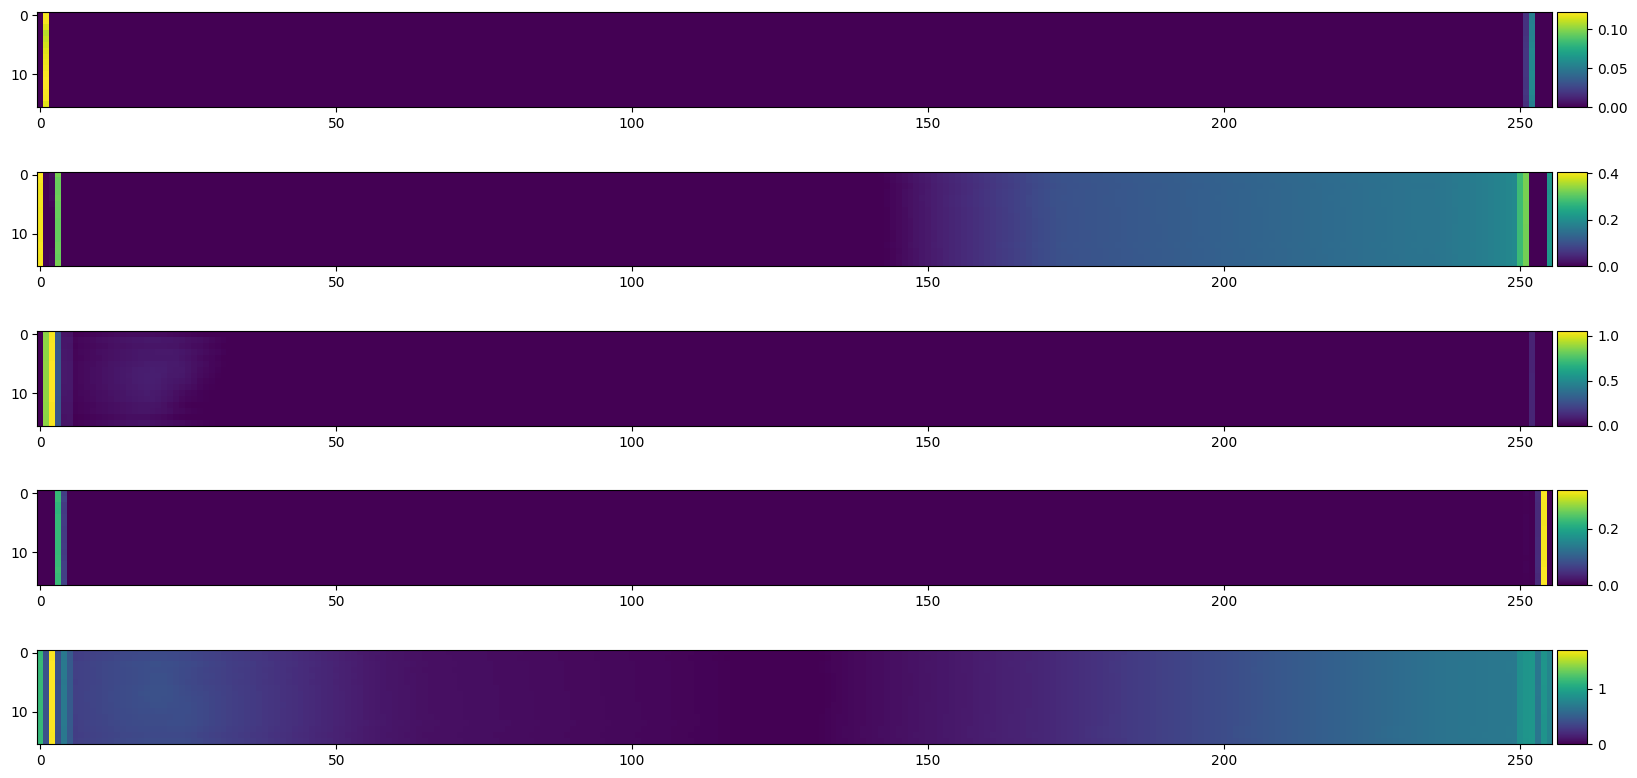

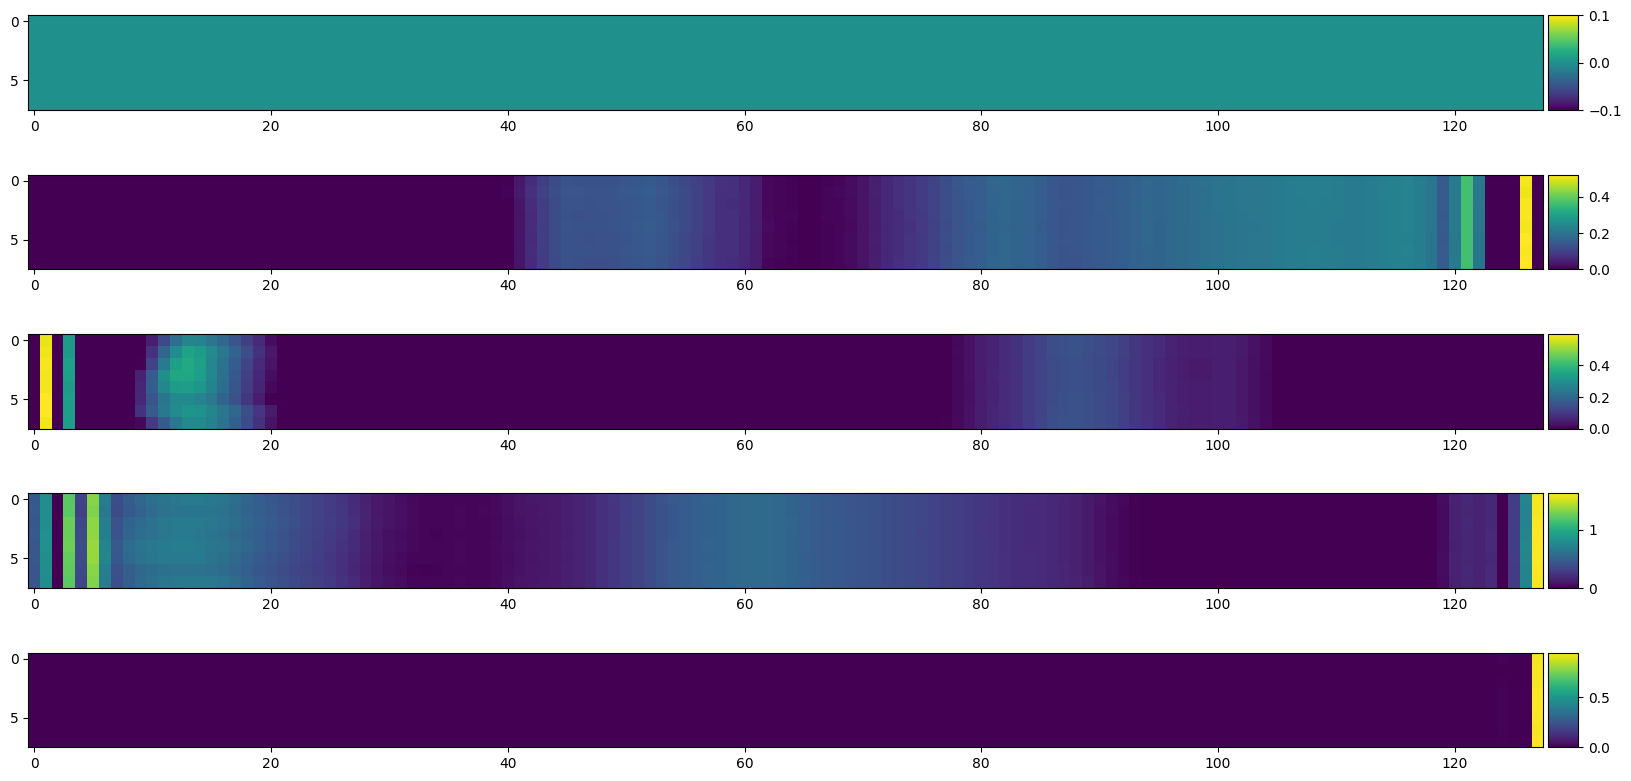

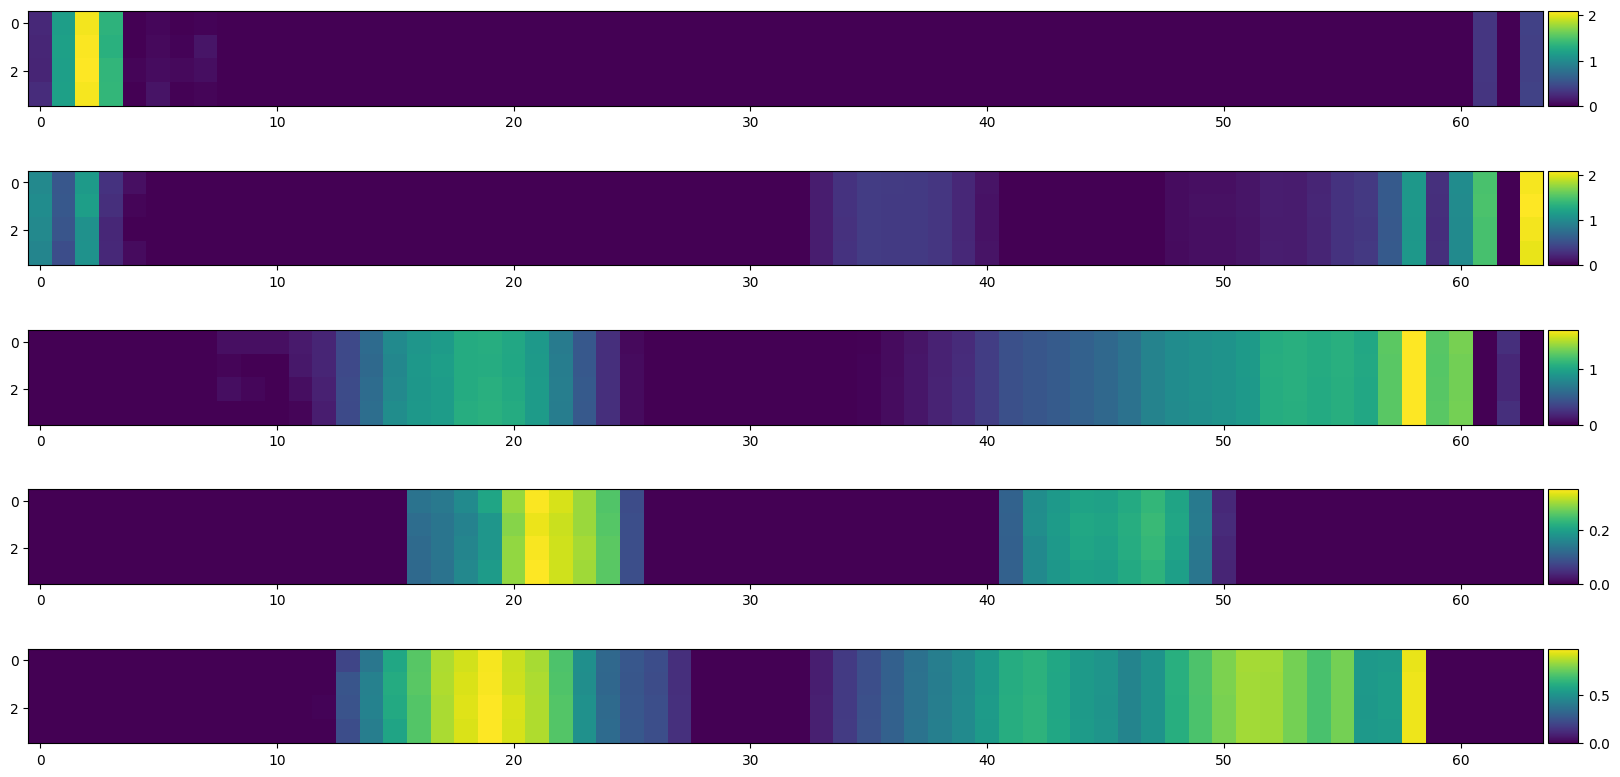

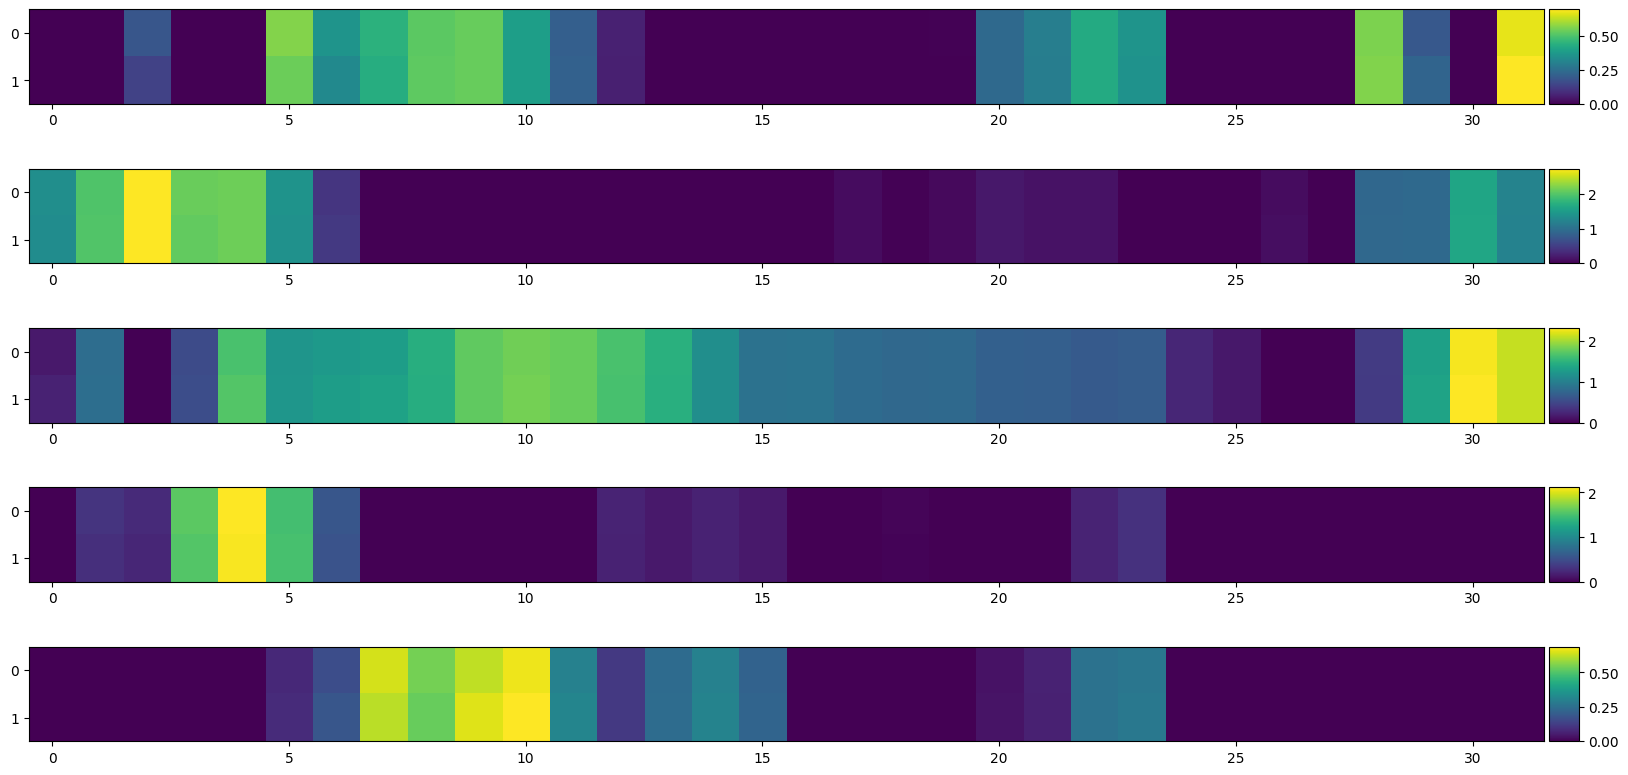

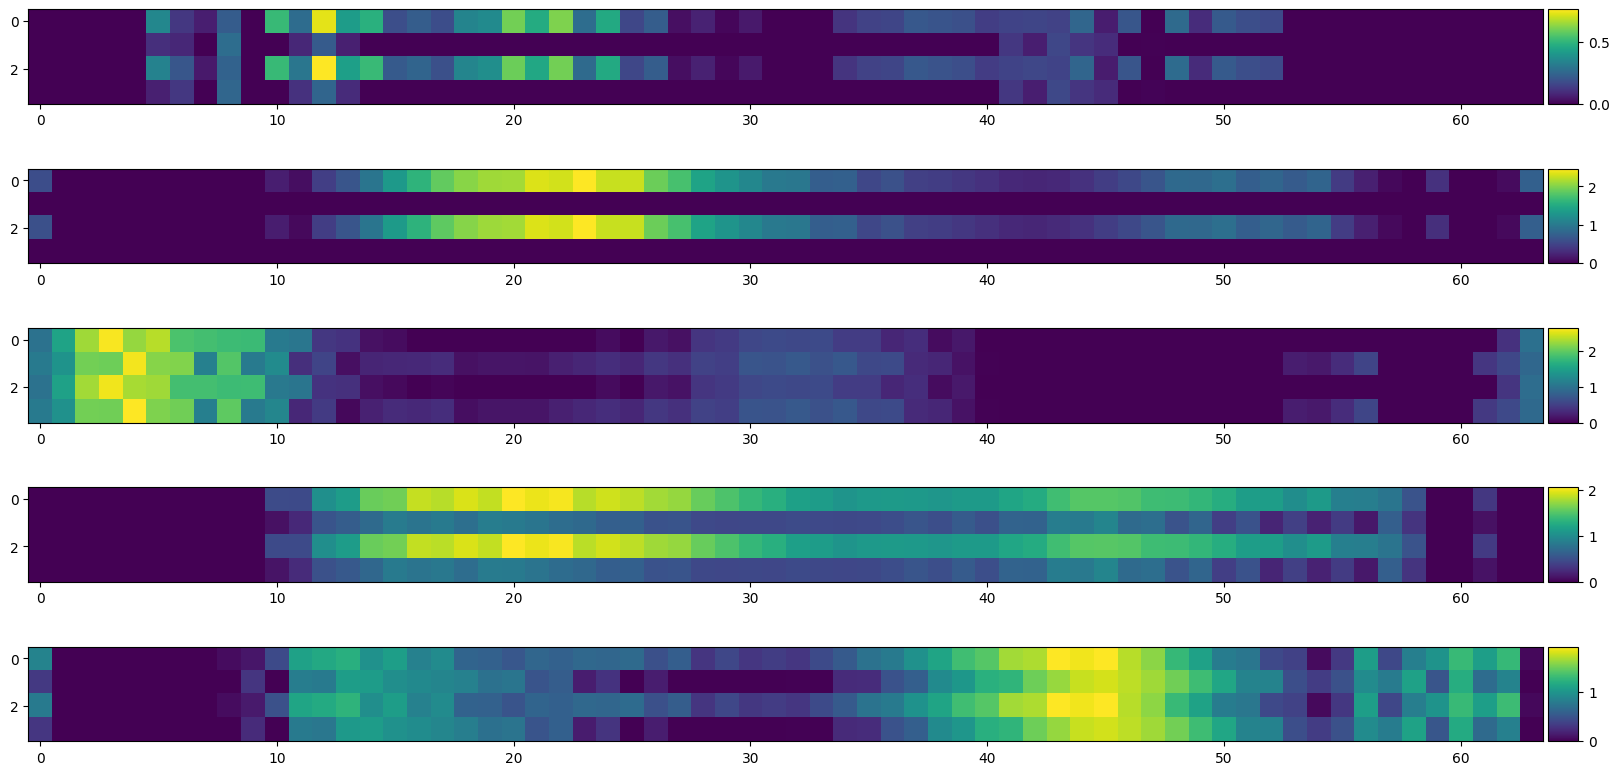

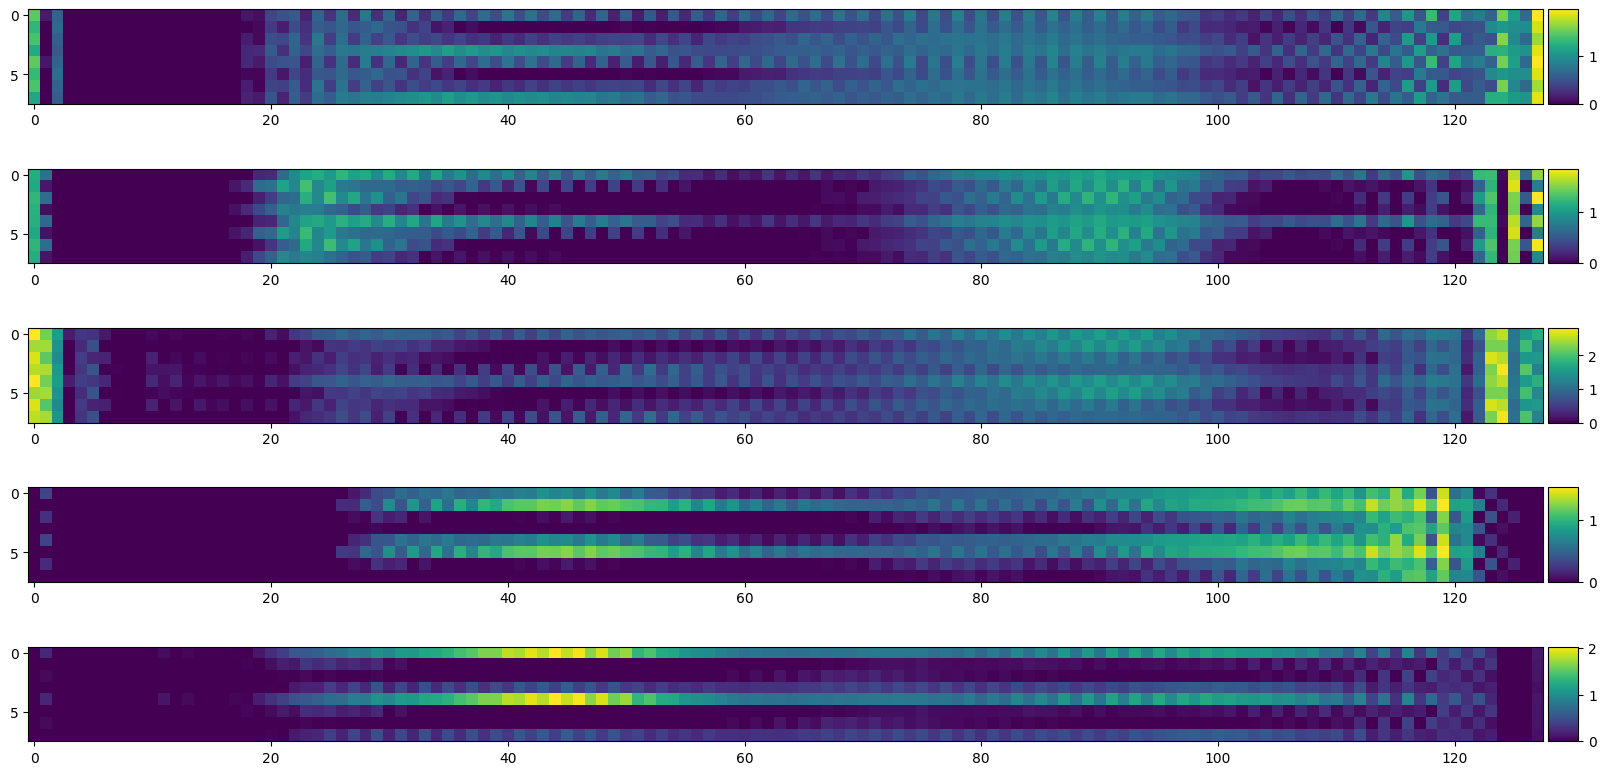

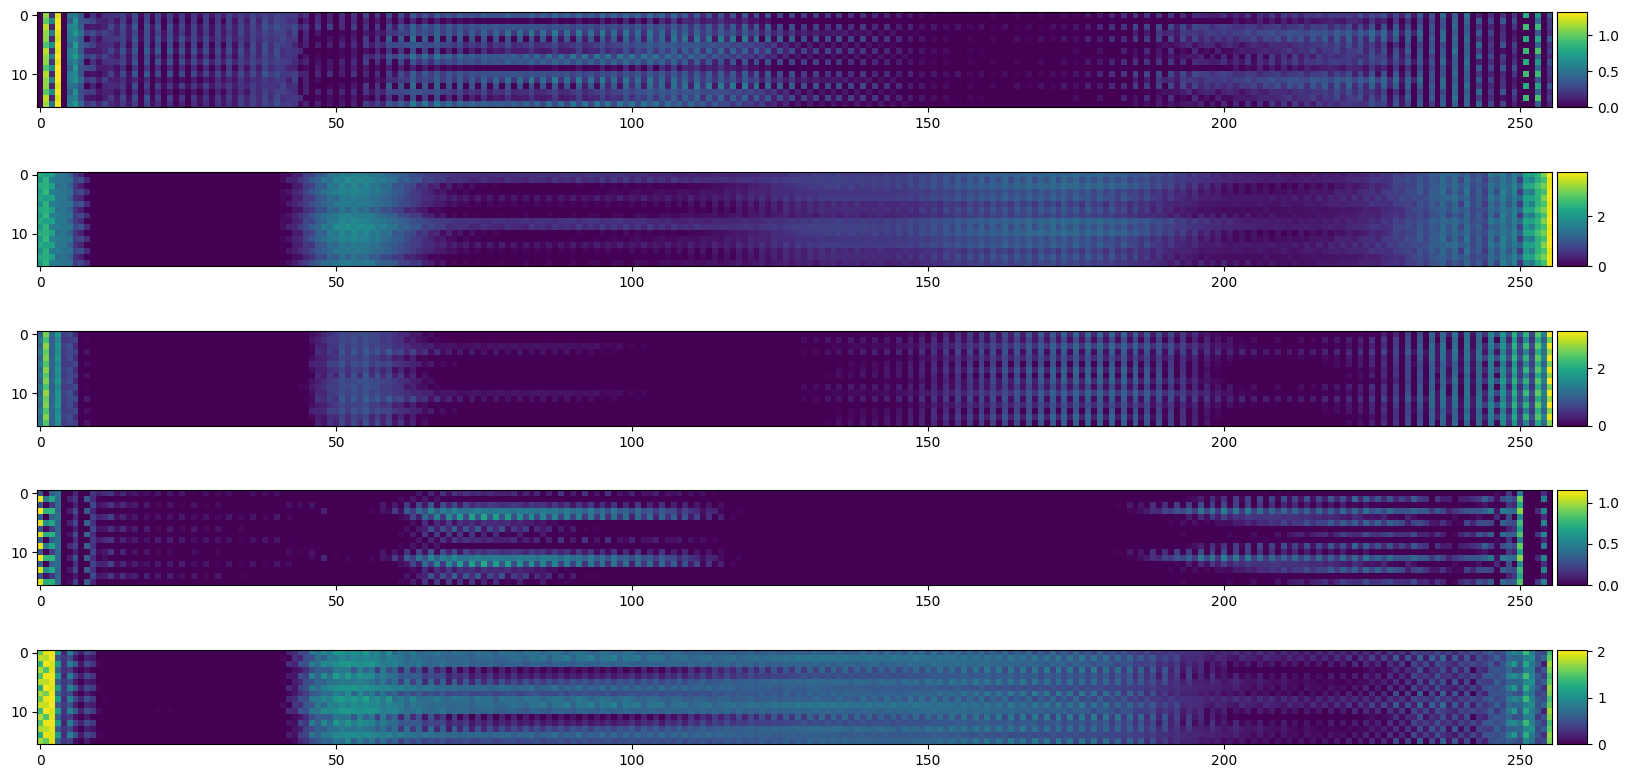

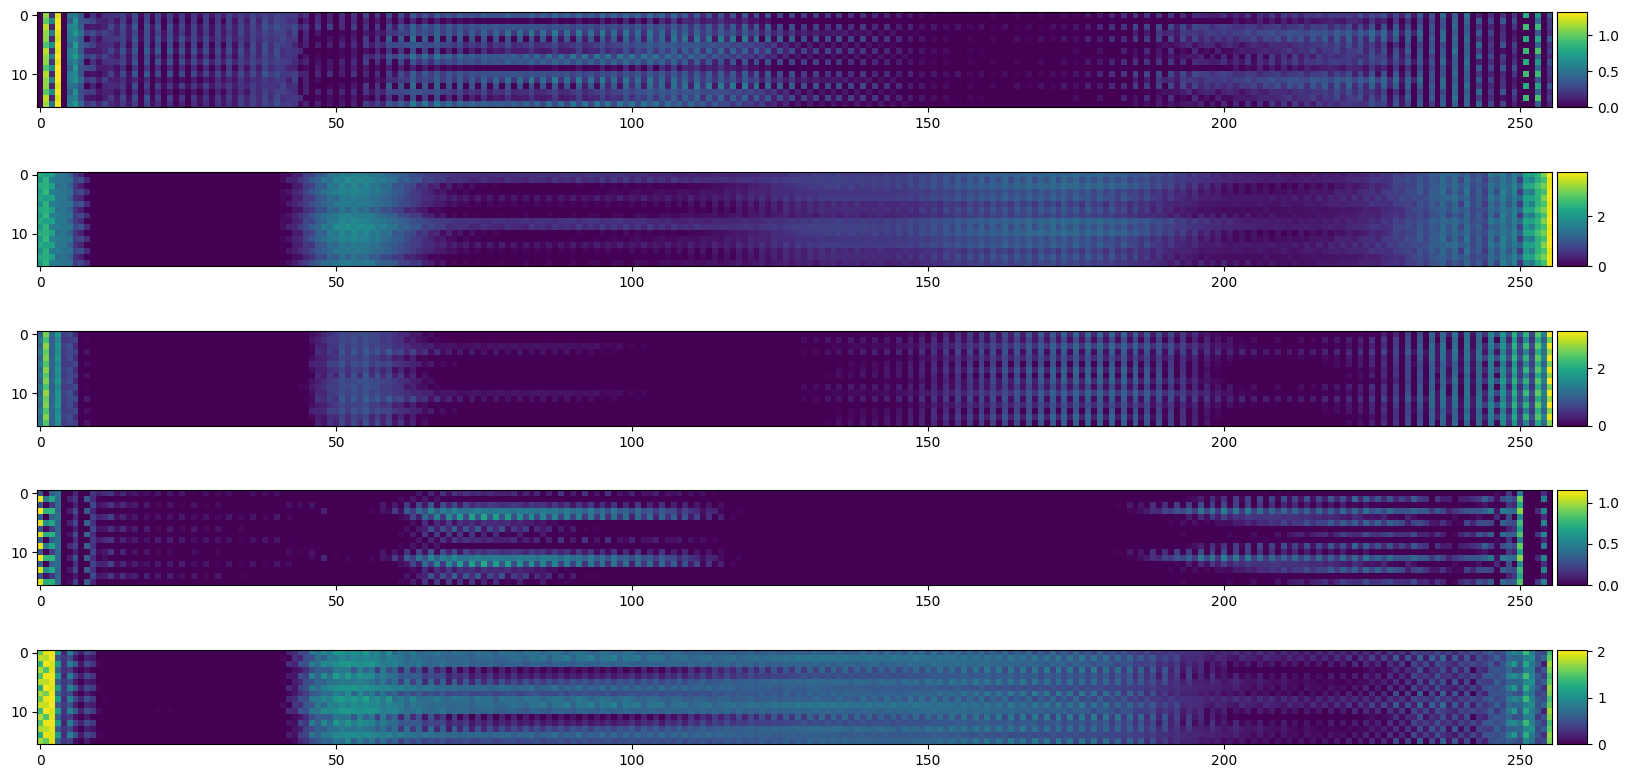

In [11]:
dp_push = datapoint
encodings = []
for i in range(len(pools)):
    dp_push = encoders[i](dp_push).detach()
    encodings.append(dp_push)
    plot_pushed_data(dp_push)
    dp_push = pools[i](dp_push)
dp_push = encoders[-1](dp_push)
plot_pushed_data(dp_push)

for upconv, decoder, encoding in zip(upconvs, decoders, reversed(encodings)):
    dp_push = upconv(dp_push)
    dp_push = torch.cat((dp_push, encoding), dim=1)
    dp_push = decoder(dp_push)
    plot_pushed_data(dp_push)

dp_conv = conv(dp_push)
plot_pushed_data(dp_push)